#  Pandas Group Operations 

For Intermediate Python module

# 1)- Importing key libraries

In [1]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

In [2]:
# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# What's life without style :). So, let's add style to our dataframes
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# first install: pip install version_information
%reload_ext version_information
%version_information pandas, numpy, seaborn, matplotlib, sys

Software versions
Python 3.6.3 64bit [MSC v.1900 64 bit (AMD64)]
IPython 7.4.0
OS Windows 10 10.0.16299 SP0
pandas 0.23.4
numpy 1.16.2
seaborn 0.9.0
matplotlib 2.1.0
sys The 'sys' distribution was not found and is required by the application
Thu Aug 22 17:04:26 2019 W. Europe Daylight Time

# 2)-Loading data

In [6]:
# set max rows
pd.set_option("display.max_rows", 20)

In [7]:
df = pd.read_csv('survey_scores_2015.csv', index_col=0)
df

,10000,13001,60985,43309,89785,57688,19366,97775,22384,31556,70964,70155,47724,37602
subject_id,,,,,,,,,,,,,,
computer_has,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
computer_os,NaN,Mac,Windows,Mac,Windows,Mac,Mac,Mac,Windows,Mac,Mac,Linux,Mac,Linux
score_bash,0,1,0,3,2,1,0,2,0,1,1,1,0,2
score_command,0,2,1,3,2,1,2,2,0,2,1,1,0,2
score_matlab,0,3,1,0,0,1,3,3,2,3,2,1,1,0
score_perl,0,0,0,0,1,0,0,0,0,0,0,0,0,1
score_python,0,0,2,1,2,0,0,1,0,0,1,1,0,1
score_r,0,0,1,2,2,0,2,0,2,0,2,0,0,2


In [8]:
df.shape

(8, 14)

# 3)- Data exploring

In [9]:
# remove index name i.e subject_id
df.index.name = None
df

,10000,13001,60985,43309,89785,57688,19366,97775,22384,31556,70964,70155,47724,37602
computer_has,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
computer_os,NaN,Mac,Windows,Mac,Windows,Mac,Mac,Mac,Windows,Mac,Mac,Linux,Mac,Linux
score_bash,0,1,0,3,2,1,0,2,0,1,1,1,0,2
score_command,0,2,1,3,2,1,2,2,0,2,1,1,0,2
score_matlab,0,3,1,0,0,1,3,3,2,3,2,1,1,0
score_perl,0,0,0,0,1,0,0,0,0,0,0,0,0,1
score_python,0,0,2,1,2,0,0,1,0,0,1,1,0,1
score_r,0,0,1,2,2,0,2,0,2,0,2,0,0,2


In [10]:
# transpose
df = df.transpose()
df

,computer_has,computer_os,score_bash,score_command,score_matlab,score_perl,score_python,score_r
10000,N,NaN,0,0,0,0,0,0
13001,Y,Mac,1,2,3,0,0,0
60985,Y,Windows,0,1,1,0,2,1
43309,Y,Mac,3,3,0,0,1,2
89785,Y,Windows,2,2,0,1,2,2
57688,Y,Mac,1,1,1,0,0,0
19366,Y,Mac,0,2,3,0,0,2
97775,Y,Mac,2,2,3,0,1,0
22384,Y,Windows,0,0,2,0,0,2
31556,Y,Mac,1,2,3,0,0,0


In [11]:
# give name to index
df.index.name = 'student'
df

,computer_has,computer_os,score_bash,score_command,score_matlab,score_perl,score_python,score_r
student,,,,,,,,
10000,N,NaN,0,0,0,0,0,0
13001,Y,Mac,1,2,3,0,0,0
60985,Y,Windows,0,1,1,0,2,1
43309,Y,Mac,3,3,0,0,1,2
89785,Y,Windows,2,2,0,1,2,2
57688,Y,Mac,1,1,1,0,0,0
19366,Y,Mac,0,2,3,0,0,2
97775,Y,Mac,2,2,3,0,1,0
22384,Y,Windows,0,0,2,0,0,2


In [12]:
# reset index with inplace=True (also see more advanced function pandas.DataFrame.reindex)
df.reset_index(inplace=True)
df

,student,computer_has,computer_os,score_bash,score_command,score_matlab,score_perl,score_python,score_r
0,10000,N,NaN,0,0,0,0,0,0
1,13001,Y,Mac,1,2,3,0,0,0
2,60985,Y,Windows,0,1,1,0,2,1
3,43309,Y,Mac,3,3,0,0,1,2
4,89785,Y,Windows,2,2,0,1,2,2
5,57688,Y,Mac,1,1,1,0,0,0
6,19366,Y,Mac,0,2,3,0,0,2
7,97775,Y,Mac,2,2,3,0,1,0
8,22384,Y,Windows,0,0,2,0,0,2
9,31556,Y,Mac,1,2,3,0,0,0


In [13]:
# delete column score_bash because it's mostly redundant with score_command
df.drop('score_bash', axis=1, inplace=True)
df

,student,computer_has,computer_os,score_command,score_matlab,score_perl,score_python,score_r
0,10000,N,NaN,0,0,0,0,0
1,13001,Y,Mac,2,3,0,0,0
2,60985,Y,Windows,1,1,0,2,1
3,43309,Y,Mac,3,0,0,1,2
4,89785,Y,Windows,2,0,1,2,2
5,57688,Y,Mac,1,1,0,0,0
6,19366,Y,Mac,2,3,0,0,2
7,97775,Y,Mac,2,3,0,1,0
8,22384,Y,Windows,0,2,0,0,2
9,31556,Y,Mac,2,3,0,0,0


In [14]:
# check datatypes
df.dtypes

student          object
computer_has     object
computer_os      object
score_command    object
score_matlab     object
score_perl       object
score_python     object
score_r          object
dtype: object

In [15]:
# convert score columns to integers
score_cols = ['score_command', 'score_matlab', 'score_perl',
              'score_python', 'score_r']
df[score_cols] = df[score_cols].astype(int)

In [16]:
df

,student,computer_has,computer_os,score_command,score_matlab,score_perl,score_python,score_r
0,10000,N,NaN,0,0,0,0,0
1,13001,Y,Mac,2,3,0,0,0
2,60985,Y,Windows,1,1,0,2,1
3,43309,Y,Mac,3,0,0,1,2
4,89785,Y,Windows,2,0,1,2,2
5,57688,Y,Mac,1,1,0,0,0
6,19366,Y,Mac,2,3,0,0,2
7,97775,Y,Mac,2,3,0,1,0
8,22384,Y,Windows,0,2,0,0,2
9,31556,Y,Mac,2,3,0,0,0


In [17]:
df.dtypes

student          object
computer_has     object
computer_os      object
score_command     int32
score_matlab      int32
score_perl        int32
score_python      int32
score_r           int32
dtype: object

# 4)-Group Operations

### 4.1)- groupby

Group series using a series of columns or a mapper (dict or key function, apply given function to group, return result as series).


In [18]:
# create group object
comp = df.groupby('computer_os')
comp

In [19]:
# apply sum function
comp.mean()

,score_command,score_matlab,score_perl,score_python,score_r
computer_os,,,,,
Linux,1.500,0.5,0.500000,1.000000,1.000000
Mac,1.625,2.0,0.000000,0.375000,0.750000
Windows,1.000,1.0,0.333333,1.333333,1.666667


In [20]:
# apply std function
comp.std()

,score_command,score_matlab,score_perl,score_python,score_r
computer_os,,,,,
Linux,0.707107,0.707107,0.707107,0.000000,1.414214
Mac,0.916125,1.195229,0.000000,0.517549,1.035098
Windows,1.000000,1.000000,0.577350,1.154701,0.577350


In [21]:
# apply count function
comp.count()

,student,computer_has,score_command,score_matlab,score_perl,score_python,score_r
computer_os,,,,,,,
Linux,2,2,2,2,2,2,2
Mac,8,8,8,8,8,8,8
Windows,3,3,3,3,3,3,3


**For "computer_has" variable**

In [22]:
# create group object
comp = df.groupby('computer_has')
comp

In [23]:
comp.mean()

,score_command,score_matlab,score_perl,score_python,score_r
computer_has,,,,,
N,0.000000,0.000000,0.000000,0.000000,0.0
Y,1.461538,1.538462,0.153846,0.692308,1.0


In [24]:
comp.std()

,score_command,score_matlab,score_perl,score_python,score_r
computer_has,,,,,
N,NaN,NaN,NaN,NaN,NaN
Y,0.877058,1.198289,0.375534,0.751068,1.0


In [25]:
comp.count()

,student,computer_os,score_command,score_matlab,score_perl,score_python,score_r
computer_has,,,,,,,
N,1,0,1,1,1,1,1
Y,13,13,13,13,13,13,13


**multiple columns as index**

known as multi-indexing

In [26]:
comp_cmd = df.groupby(['computer_os','score_command']).mean()
comp_cmd

score_matlab  score_perl  score_python  score_r
computer_os score_command                                                 
Linux       1                       1.0         0.0          1.00      0.0
            2                       0.0         1.0          1.00      2.0
Mac         0                       1.0         0.0          0.00      0.0
            1                       1.5         0.0          0.50      1.0
            2                       3.0         0.0          0.25      0.5
            3                       0.0         0.0          1.00      2.0
Windows     0                       2.0         0.0          0.00      2.0
            1                       1.0         0.0          2.00      1.0
            2                       0.0         1.0          2.00      2.0

In [27]:
comp_cmd.index

MultiIndex(levels=[['Linux', 'Mac', 'Windows'], [0, 1, 2, 3]],
           labels=[[0, 0, 1, 1, 1, 1, 2, 2, 2], [1, 2, 0, 1, 2, 3, 0, 1, 2]],
           names=['computer_os', 'score_command'])

In [28]:
comp_cmd.loc['Linux']

,score_matlab,score_perl,score_python,score_r
score_command,,,,
1,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,2.0


In [29]:
comp_cmd.loc['Linux', 1]

score_matlab    1.0
score_perl      0.0
score_python    1.0
score_r         0.0
Name: (Linux, 1), dtype: float64

In [30]:
comp_cmd['score_matlab']

computer_os  score_command
Linux        1                1.0
             2                0.0
Mac          0                1.0
             1                1.5
             2                3.0
             3                0.0
Windows      0                2.0
             1                1.0
             2                0.0
Name: score_matlab, dtype: float64

In [31]:
comp_cmd['score_matlab']['Linux']

score_command
1    1.0
2    0.0
Name: score_matlab, dtype: float64

In [32]:
comp_cmd['score_matlab']['Linux', 1]

1.0

In [33]:
type(comp_cmd['score_matlab'])

pandas.core.series.Series

You may want to ***not*** have the columns you are grouping by become your index. This can be easily achieved as shown below

In [34]:
comp_cmd2 = df.groupby(['computer_os','score_command'], as_index=False).mean()
comp_cmd2

,computer_os,score_command,score_matlab,score_perl,score_python,score_r
0,Linux,1,1.0,0.0,1.00,0.0
1,Linux,2,0.0,1.0,1.00,2.0
2,Mac,0,1.0,0.0,0.00,0.0
3,Mac,1,1.5,0.0,0.50,1.0
4,Mac,2,3.0,0.0,0.25,0.5
5,Mac,3,0.0,0.0,1.00,2.0
6,Windows,0,2.0,0.0,0.00,2.0
7,Windows,1,1.0,0.0,2.00,1.0
8,Windows,2,0.0,1.0,2.00,2.0


In [35]:
comp_cmd2.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

### 4.2)-melt

Massage a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are "unpivoted" to the row axis, leaving just two non-identifier columns, 'variable' and 'value'.

In [36]:
df

,student,computer_has,computer_os,score_command,score_matlab,score_perl,score_python,score_r
0,10000,N,NaN,0,0,0,0,0
1,13001,Y,Mac,2,3,0,0,0
2,60985,Y,Windows,1,1,0,2,1
3,43309,Y,Mac,3,0,0,1,2
4,89785,Y,Windows,2,0,1,2,2
5,57688,Y,Mac,1,1,0,0,0
6,19366,Y,Mac,2,3,0,0,2
7,97775,Y,Mac,2,3,0,1,0
8,22384,Y,Windows,0,2,0,0,2
9,31556,Y,Mac,2,3,0,0,0


In [37]:
df_melted = pd.melt(df, id_vars=['computer_has', 'computer_os'], value_vars=score_cols)
df_melted

,computer_has,computer_os,variable,value
0,N,NaN,score_command,0
1,Y,Mac,score_command,2
2,Y,Windows,score_command,1
3,Y,Mac,score_command,3
4,Y,Windows,score_command,2
5,Y,Mac,score_command,1
6,Y,Mac,score_command,2
7,Y,Mac,score_command,2
8,Y,Windows,score_command,0
9,Y,Mac,score_command,2


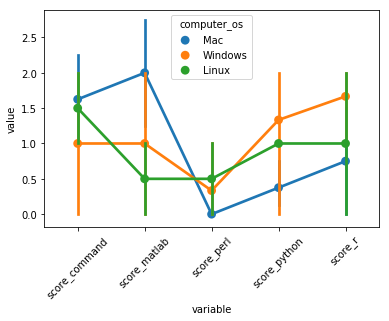

In [38]:
sns.pointplot(x='variable', y='value', hue='computer_os', data=df_melted)
plt.xticks(rotation=45);

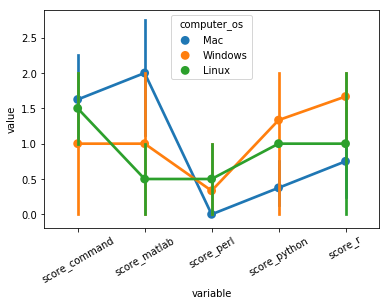

In [39]:
fig, ax = plt.subplots()
sns.pointplot(x='variable', y='value', hue='computer_os', data=df_melted, axis=ax)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=30);

### 4.3)-pivot

Reshape dataframe from long format to wide format. That is, produce a "pivot" table based on column values. Uses unique values from index / columns to form axes of the resulting DataFrame.

`df.pivot(index=None, columns=None, values=None)`

* `index`: string or object. Column name to use to make new frame's index. If None, uses existing index.
* `columns`: string or object. Column name to use to make new frame's columns
* `values`: string or object. Column name to use for populating new frame's values. If not specified, all remaining columns will be used and the result will have hierarchically indexed columns

In [40]:
#par example

df = pd.DataFrame({'foo': ['one','one','one','two','two','two'],
                       'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                       'baz': [1, 2, 3, 4, 5, 6],
                       'faz': [1, 2, 3, 4, 5, 6]})
df

,foo,bar,baz,faz
0,one,A,1,1
1,one,B,2,2
2,one,C,3,3
3,two,A,4,4
4,two,B,5,5
5,two,C,6,6


In [41]:
df.pivot(index='foo', columns='bar', values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [42]:
df_pivot = df.pivot(index='foo', columns='bar')
df_pivot

baz       faz      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   1  2  3
two   4  5  6   4  5  6

In [43]:
df_pivot['baz']

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [44]:
# columns is multi-level
df_pivot.columns

MultiIndex(levels=[['baz', 'faz'], ['A', 'B', 'C']],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]],
           names=[None, 'bar'])

In [45]:
# index is not multi-level
df_pivot.index

Index(['one', 'two'], dtype='object', name='foo')

In [46]:
# example 2: create a dataframe that's "stacked"

import pandas.util.testing as tm; tm.N = 3
def unpivot(frame):
    N, K = frame.shape
    data = {'value' : frame.values.ravel('F'),
            'variable' : np.asarray(frame.columns).repeat(N),
            'date' : np.tile(np.asarray(frame.index), K)}
    return pd.DataFrame(data, columns=['date', 'variable', 'value'])
df2 = unpivot(tm.makeTimeDataFrame())
df2

,date,variable,value
0,2000-01-03,A,0.521997
1,2000-01-04,A,0.527944
2,2000-01-05,A,-0.956334
3,2000-01-03,B,-1.148625
4,2000-01-04,B,0.466134
5,2000-01-05,B,-1.388067
6,2000-01-03,C,0.366233
7,2000-01-04,C,2.029962
8,2000-01-05,C,-1.308076
9,2000-01-03,D,1.767717


If we wanted all the data for variable A, we could do this

In [47]:
df2[df2['variable'] == 'A']

,date,variable,value
0,2000-01-03,A,0.521997
1,2000-01-04,A,0.527944
2,2000-01-05,A,-0.956334


suppose we wish to do time series operations with the variables

A better representation would be where the columns are the unique variables and an index of dates identifies individual observations. 

In [48]:
# to reshape the data into this form, use the pivot function
df2_pivot = df2.pivot(index='date', columns='variable', values='value')
df2_pivot

variable,A,B,C,D
date,,,,
2000-01-03,0.521997,-1.148625,0.366233,1.767717
2000-01-04,0.527944,0.466134,2.029962,-1.872827
2000-01-05,-0.956334,-1.388067,-1.308076,0.751590


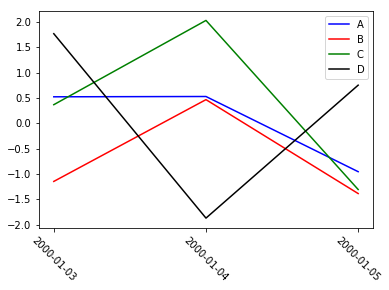

In [49]:
plt.plot(df2_pivot.index, df2_pivot.A, 'b', 
         df2_pivot.index, df2_pivot.B, 'r',
         df2_pivot.index, df2_pivot.C, 'g', 
         df2_pivot.index, df2_pivot.D, 'k')
plt.legend(df2_pivot.columns)
xlabels = [x.strftime('%Y-%m-%d') for x in df2_pivot.index]
plt.xticks(xlabels, xlabels)
plt.xticks(rotation=-45);

### 4.4)-pivot_table

Create a spreadsheet-style pivot table as a DataFrame. The levels in the pivot table will be stored in MultiIndex objects (hierarchical indexes) on the index and columns of the result DataFrame. Similar to `pivot`, it is a generalization of pivot that can handle duplicate values for one index/column pair.

`df.pivot_table(values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')`

In [50]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                         "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7]})
df

,A,B,C,D
0,foo,one,small,1
1,foo,one,large,2
2,foo,one,large,2
3,foo,two,small,3
4,foo,two,small,3
5,bar,one,large,4
6,bar,one,small,5
7,bar,two,small,6
8,bar,two,large,7


In [51]:
table = pd.pivot_table(df, values='D', index=['A', 'B'],
                       columns=['C'], aggfunc=np.sum)
table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

### 4.5)-stack

Pivot a level of the column labels (inverse operation from `unstack`).

`df.stack(level=-1, dropna=True)`

* `level`: int, string, or list of these, default last level. Level(s) to stack, can pass level name
* `dropna`: boolean, default True. Whether to drop rows in the resulting Frame/Series with no valid values

In [52]:
df2 = pd.DataFrame(np.random.randint(0, 9, size=(5,3)),
                  index=('sample1', 'sample2', 'sample3', 'sample4', 'sample5'),
                  columns=('feature1', 'feature2', 'feature3'))
df2

,feature1,feature2,feature3
sample1,5,1,2
sample2,6,0,2
sample3,1,1,5
sample4,0,2,6
sample5,6,4,7


In [53]:
df2_stack = df2.stack()
df2_stack

sample1  feature1    5
         feature2    1
         feature3    2
sample2  feature1    6
         feature2    0
         feature3    2
sample3  feature1    1
         feature2    1
         feature3    5
sample4  feature1    0
         feature2    2
         feature3    6
sample5  feature1    6
         feature2    4
         feature3    7
dtype: int32

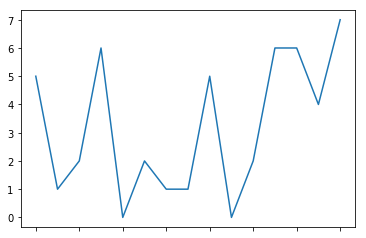

In [54]:
df2_stack.plot()

In [55]:
df2_stack['sample1']

feature1    5
feature2    1
feature3    2
dtype: int32

In [56]:
df2_stack['sample1']['feature3']

2

### 4.6)-unstack

Pivot based on the index values, instead of a column. Requires hierarchical index labels, returns a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels. If the index is not a MultiIndex, the output will be a Series (the analogue of stack when the columns are not a MultiIndex). The level involved will automatically get sorted.

`df.unstack(level=-1, fill_value=None)`

* `level`: int, string, or list of these, default -1 (last level) Level(s) of index to unstack, can pass level name
* `fill_value`: replace NaN with this value if the unstack produces missing values

In [57]:
df2

,feature1,feature2,feature3
sample1,5,1,2
sample2,6,0,2
sample3,1,1,5
sample4,0,2,6
sample5,6,4,7


In [58]:
df2_unstack = df2.unstack()
df2_unstack

feature1  sample1    5
          sample2    6
          sample3    1
          sample4    0
          sample5    6
feature2  sample1    1
          sample2    0
          sample3    1
          sample4    2
          sample5    4
feature3  sample1    2
          sample2    2
          sample3    5
          sample4    6
          sample5    7
dtype: int32

In [59]:
df2_unstack['feature1']

sample1    5
sample2    6
sample3    1
sample4    0
sample5    6
dtype: int32

In [60]:
df2_unstack['feature1']['sample4']

0

In [61]:
print(type(df2))
print(type(df2_stack))
print(type(df2_unstack))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


### 4.7)-value_counts

In [62]:
df2

,feature1,feature2,feature3
sample1,5,1,2
sample2,6,0,2
sample3,1,1,5
sample4,0,2,6
sample5,6,4,7


In [63]:
df2.feature1.value_counts()

6    2
5    1
1    1
0    1
Name: feature1, dtype: int64

In [64]:
df2 = df2.astype(bool)

In [65]:
for feature in df2.columns:
    num_true = df2[feature].value_counts()[True]
    if num_true > 3:
        print(feature, num_true)

feature1 4
feature2 4
feature3 5
